In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Subset
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import logging
from tqdm import tqdm

import sys
sys.path.append('../..')
import random

from logger import setup_logging
from models import MLP
from utils import (
    dataset,
    test,
    train,
    train_copy,
    utils,
    visualisation
)

/home/yanh/ENTER/envs/env02/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


数据分布画图

In [2]:
LOG_CONFIG_PATH = os.path.join(os.path.abspath("../.."), "logger", "logger_config.json")
LOG_DIR   = os.path.join(os.path.abspath("../.."), "logs")
DATA_DIR  = os.path.join(os.path.abspath("../.."), "data")
IMAGE_DIR = os.path.join(os.path.abspath("../.."), "images")

获取balance和imbalance数据集

In [3]:
balance_data, _, _ = dataset.get_dataset(data_path=DATA_DIR, balanced=True)
imbalance_data, _, _ = dataset.get_dataset(data_path=DATA_DIR, balanced=False)

In [4]:
balance_data.labels.value_counts()

0    20000
3    20000
5    20000
6    20000
2    20000
4    20000
1    20000
Name: label, dtype: int64

In [5]:
imbalance_data.labels.value_counts()

label
0        1221303
3         192161
5          34383
2           5130
6           1271
1           1166
4             22
dtype: int64

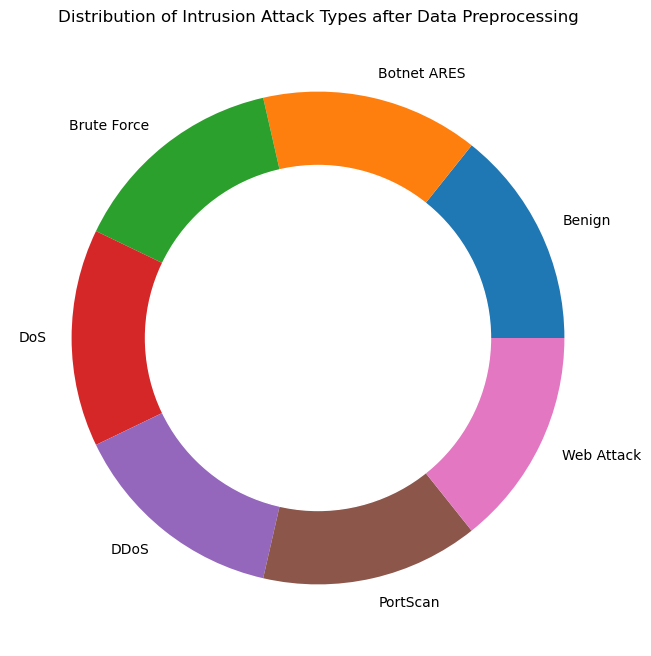

In [6]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Distribution of Intrusion Attack Types after Data Preprocessing')
plt.pie(balance_data.labels.value_counts(), labels=['Benign', 'Botnet ARES', 'Brute Force', 'DoS', 'DDoS', 'PortScan', 'Web Attack'])
p = plt.gcf()
p.gca().add_artist(circle)
plt.savefig('balance.pdf', format='pdf')

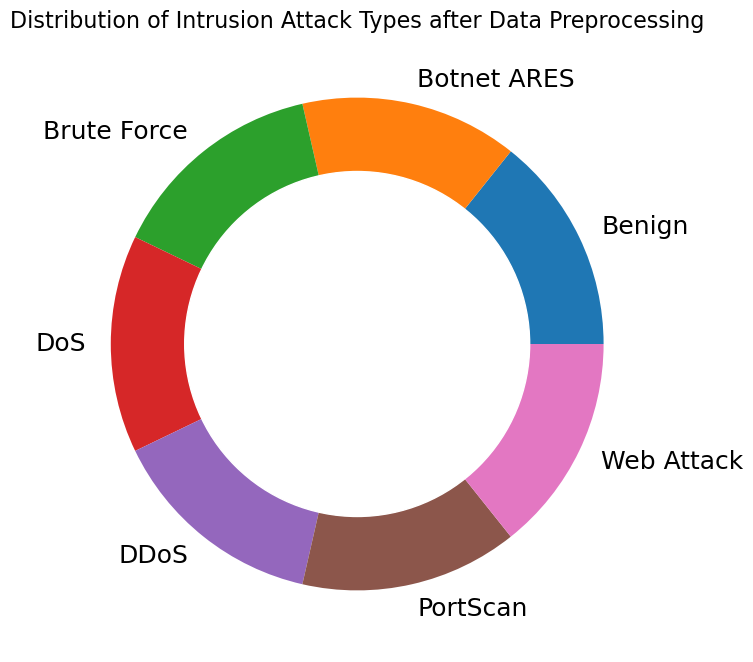

In [17]:
#使用fontsize去放大字体
plt.rcParams['font.size'] = 18  # 设置标签的字体大小
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
#plt.title('Distribution of Intrusion Attack Types after Data Preprocessing', fontsize=16, fontname='Times New Roman')
plt.title('Distribution of Intrusion Attack Types after Data Preprocessing', fontsize=16)
plt.pie(balance_data.labels.value_counts(), labels=['Benign', 'Botnet ARES', 'Brute Force', 'DoS', 'DDoS', 'PortScan', 'Web Attack'])
p = plt.gcf()
p.gca().add_artist(circle)
plt.savefig('balance.pdf', format='pdf')

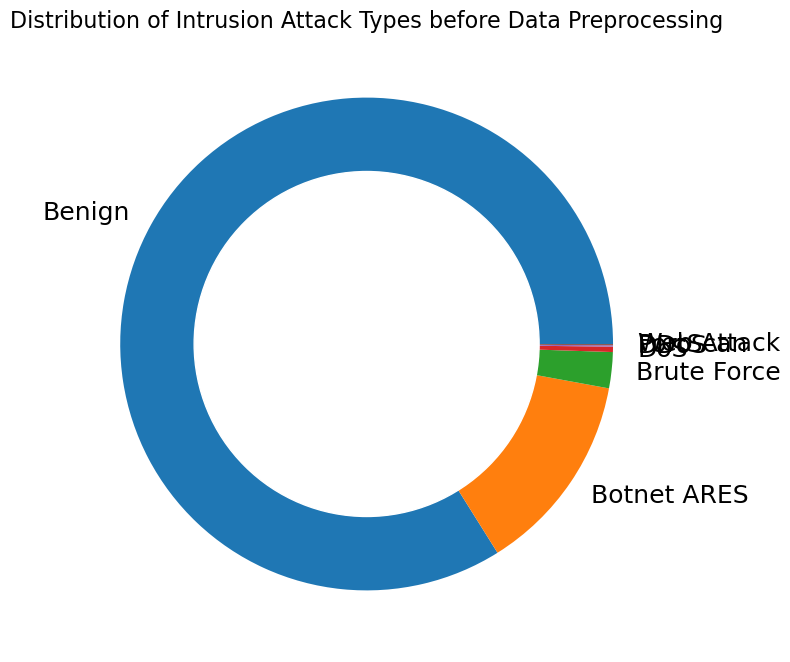

In [18]:
plt.rcParams['font.size'] = 18  # 设置标签的字体大小
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Distribution of Intrusion Attack Types before Data Preprocessing', fontsize=16)
plt.pie(imbalance_data.labels.value_counts(), labels=['Benign', 'Botnet ARES', 'Brute Force', 'DoS', 'DDoS', 'PortScan', 'Web Attack'])
p = plt.gcf()
p.gca().add_artist(circle)
plt.savefig('imbalance.pdf', format='pdf')

In [26]:
imbalance_data.labels.value_counts()

label
0        1221303
3         192161
5          34383
2           5130
6           1271
1           1166
4             22
dtype: int64

In [28]:
new_labels = imbalance_data.labels.replace({2: "Other", 6: "Other", 1: "Other", 4: "Other"})
new_labels.value_counts()

label
0        1221303
3         192161
5          34383
Other       7589
dtype: int64

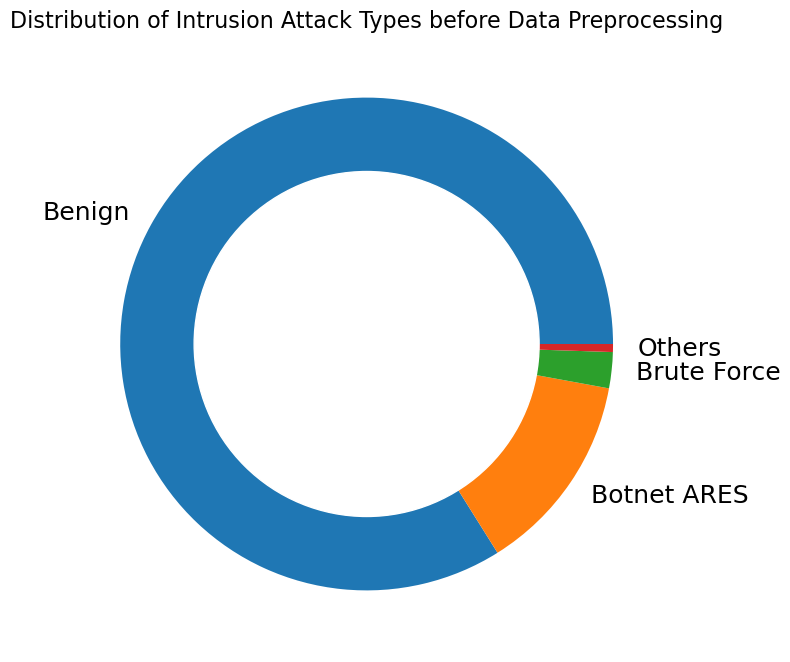

In [30]:
plt.rcParams['font.size'] = 18  # 设置标签的字体大小
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Distribution of Intrusion Attack Types before Data Preprocessing', fontsize=16)
plt.pie(new_labels.value_counts(), labels=['Benign', 'Botnet ARES', 'Brute Force', 'Others'])
p = plt.gcf()
p.gca().add_artist(circle)
plt.savefig('imbalance.pdf', format='pdf')